In [14]:
from nilearn import image, input_data, masking, plotting, signal
from nilearn.datasets import MNI152_FILE_PATH
from nilearn.plotting import plot_roi, plot_epi, show
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import detrend, resample, resample_poly
from scipy.stats import zscore
from utilities import files
import os.path as op
%matplotlib inline

In [3]:
path = "/home/mszul/datasets/braindyn_localizer"
participants = files.get_folders_files(path)[0]
participant = participants[0]
_id = participant.split("/")[-1]

In [6]:
mask = "masks/hocp-Occipital_Pole.nii.gz"
nifti = op.join(
    participant, 
    "func", 
    "{}_task-faces_dir-AP_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz".format(_id)
)
brain_mask = op.join(
    participant,
    "func",
    "{}_task-faces_dir-AP_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz".format(_id)
)
t1 = op.join(
    participant,
    "anat",
    "{}_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz".format(_id)
)

In [7]:
flicker = image.smooth_img(nifti, fwhm=None)
roi = image.smooth_img(mask, fwhm=None)
roi = image.resample_to_img(roi, flicker, fill_value=0, clip=True, interpolation="nearest")
mean_flicker = image.mean_img(flicker)


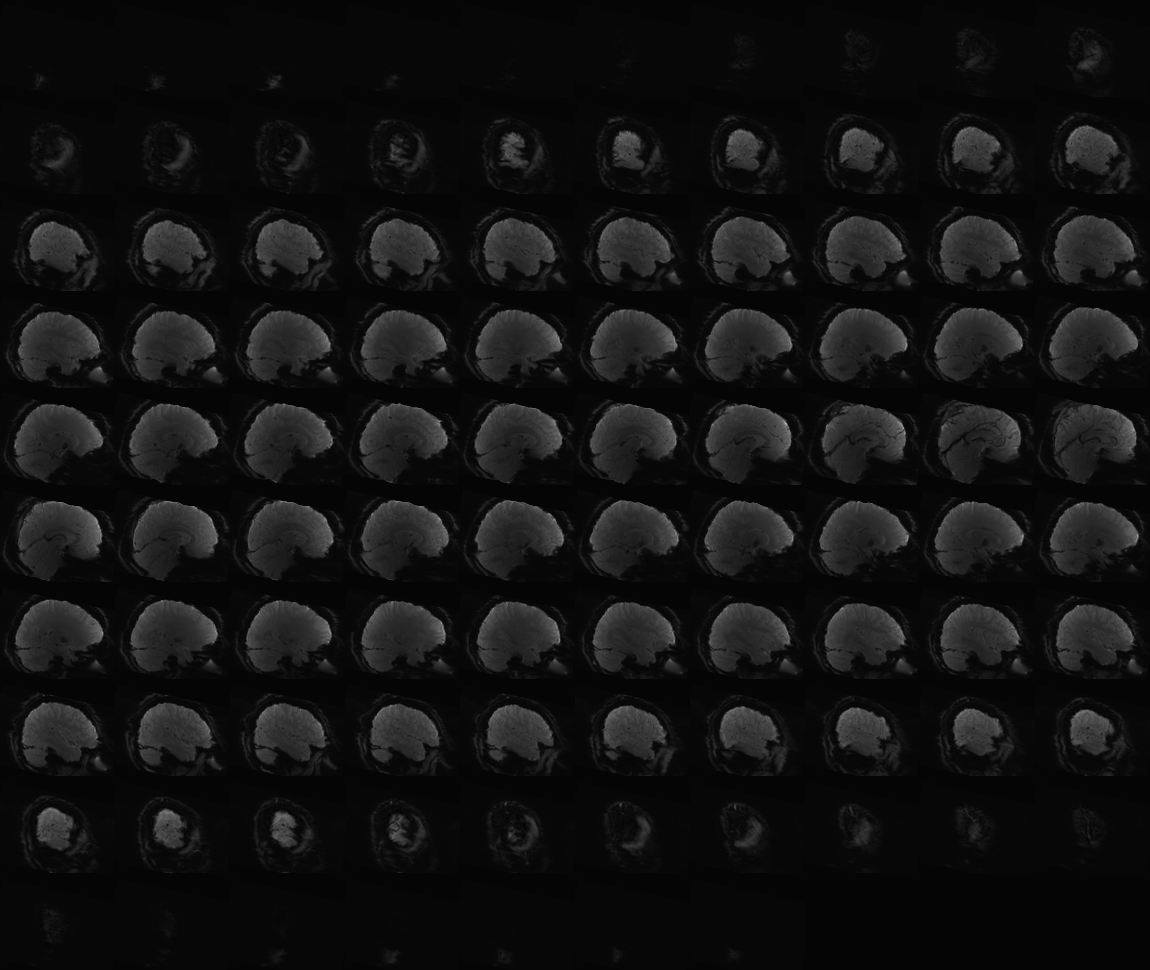
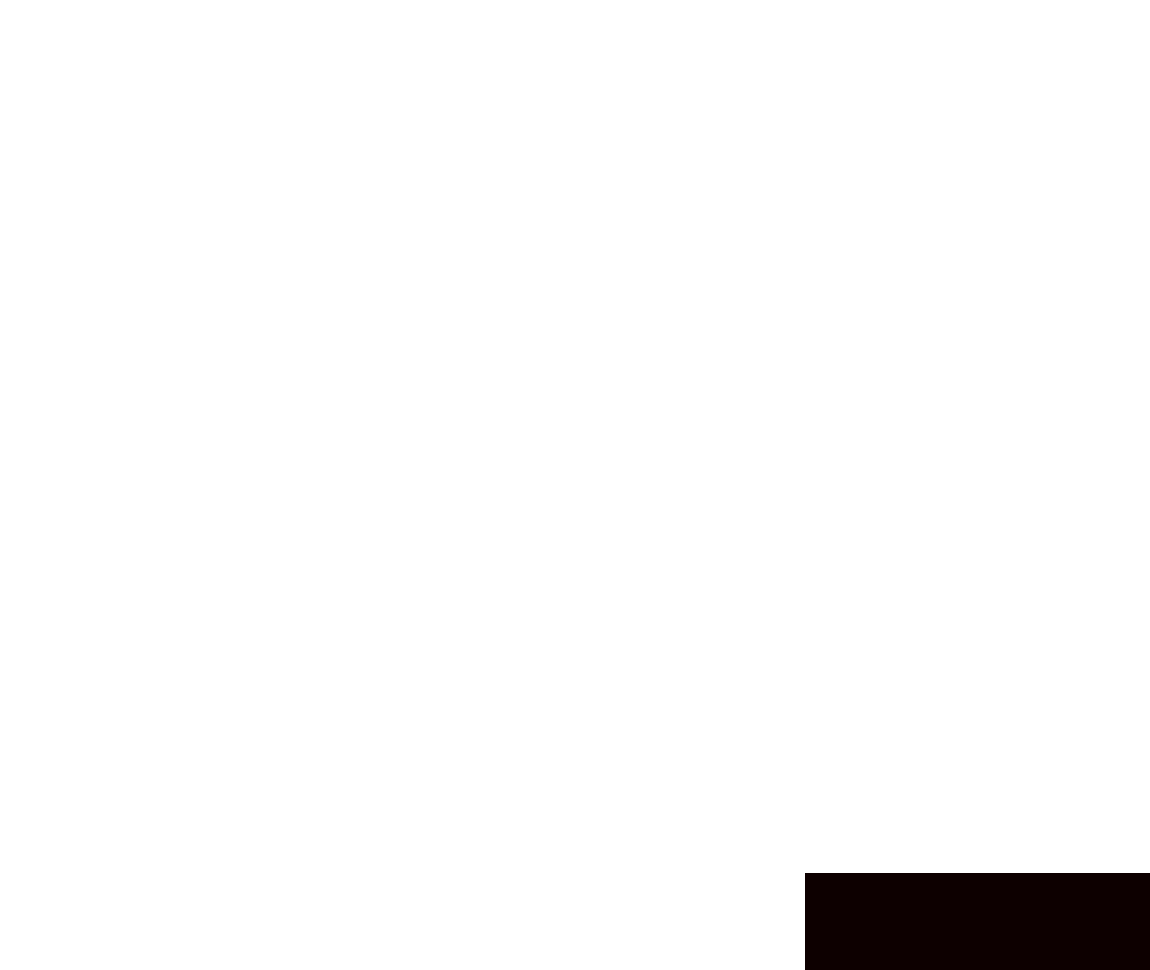

In [8]:
plotting.view_img(roi, threshold=.9999, bg_img=mean_flicker, black_bg=True)

In [9]:
flicker_masked = masking.apply_mask(flicker, roi, smoothing_fwhm=3)
voxel_sample = np.random.randint(0,flicker_masked.shape[1], 500)
voxel_sample.sort()
flicker_voxels = flicker_masked[:, voxel_sample]
del flicker_masked
time = np.arange(flicker_voxels.shape[0])*1.3

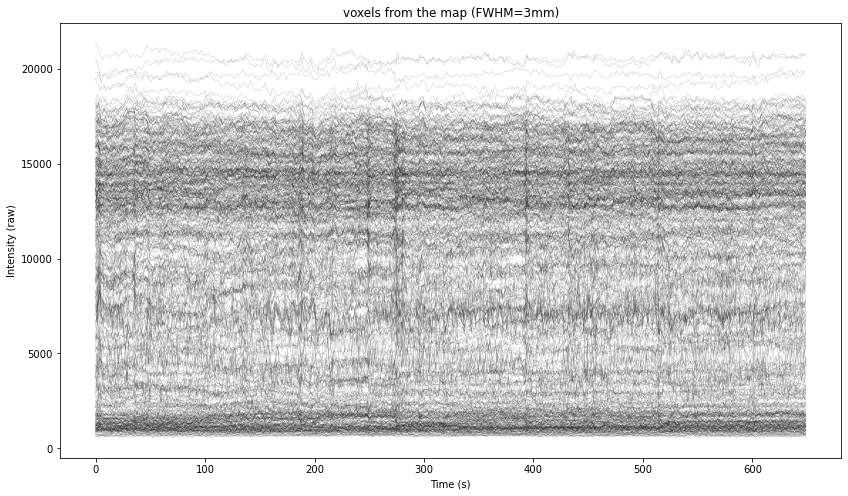

In [10]:
f, ax = plt.subplots(figsize=(14,8))
data = flicker_voxels
plt.plot(time, data, "black", alpha=0.2, lw=0.5)
plt.title("voxels from the map (FWHM=3mm)")
plt.ylabel("Intensity (raw)")
plt.xlabel("Time (s)");

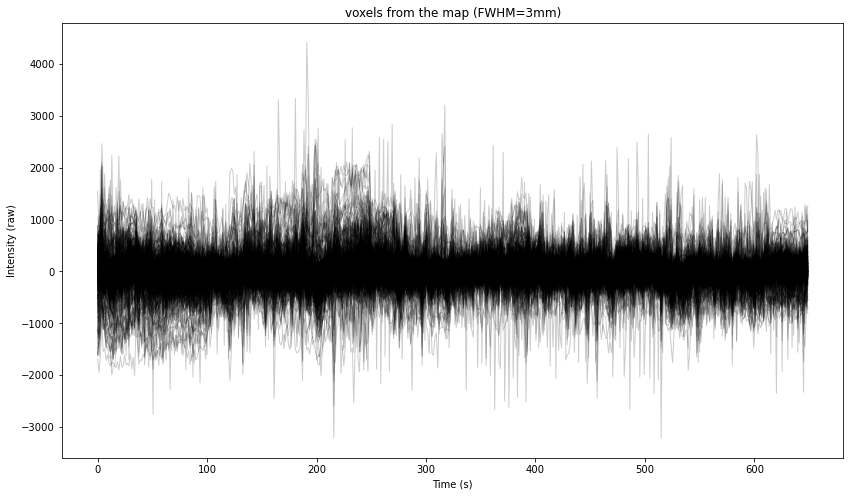

In [11]:
f, ax = plt.subplots(figsize=(14,8))
data = flicker_voxels
data = signal._detrend(data, type="linear")
plt.plot(time, data, "black", alpha=0.2, lw=1)
plt.title("voxels from the map (FWHM=3mm)")
plt.ylabel("Intensity (raw)")
plt.xlabel("Time (s)");

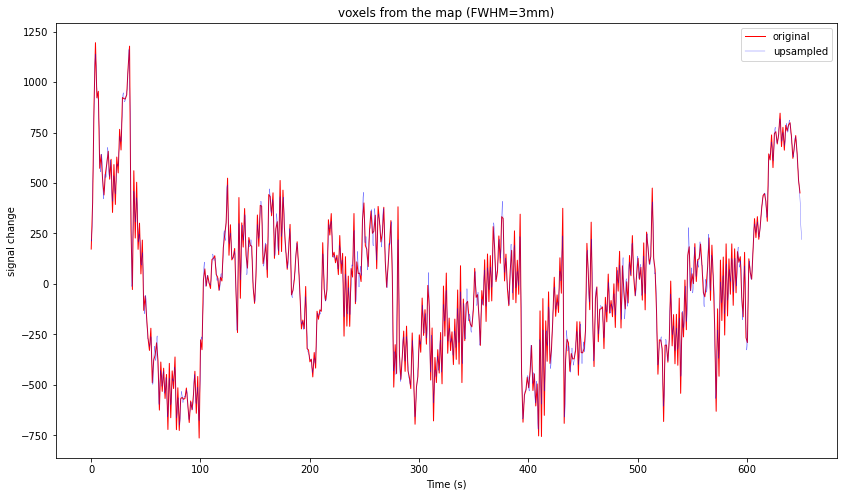

In [34]:
f, ax = plt.subplots(figsize=(14,8))
data = flicker_voxels[:,:2]
data = signal._detrend(data, type="linear")
og_time = data.shape[0]*1.3
res_y, res_t = resample(data[:,1], int(og_time/0.0005), t=time, window=2)
plt.plot(time, data[:,1], "red", alpha=1, lw=1, label="original")
plt.plot(res_t, res_y, "blue", lw=0.25, label="upsampled")
plt.title("voxels from the map (FWHM=3mm)")
plt.ylabel("signal change")
plt.xlabel("Time (s)")
plt.legend();

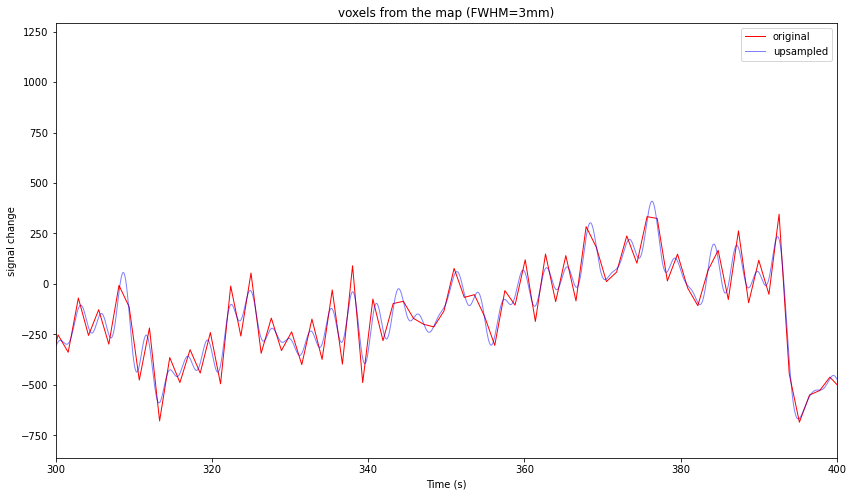

In [40]:
f, ax = plt.subplots(figsize=(14,8))
plt.plot(time, data[:,1], "red", alpha=1, lw=1, label="original")
plt.plot(res_t, res_y, "blue", lw=1, alpha=0.5, label="upsampled")
plt.title("voxels from the map (FWHM=3mm)")
plt.ylabel("signal change")
plt.xlabel("Time (s)")
plt.xlim([300, 400])
plt.legend();

In [ ]:
data.shape